In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import stellargraph as sg
import graphnets
from graphnets import gcn_pipeline, graphsage_pipeline
from collections import defaultdict


In [2]:
network = pd.read_csv('data/bio-pathways-network.csv')
graph = nx.from_pandas_edgelist(network, 'Gene ID 1', 'Gene ID 2')

In [3]:
multi_diseases = pd.read_csv('data/diseased-proteins.csv', index_col=0)

In [4]:
adding = defaultdict(list)
for node in graph.nodes():
    gene = node
    if gene not in multi_diseases.index:
        adding[gene] = [0] * len(multi_diseases.columns)
nondiseased = pd.DataFrame(adding).transpose()
nondiseased.columns=multi_diseases.columns
multi_diseases = pd.concat([multi_diseases, nondiseased])

In [5]:
three_orbitals_exact = pd.read_csv('motifs location/result3.csv', index_col=0)
three_orbitals = pd.read_csv('motifs location/subsampling_3.csv', index_col=1).drop('Unnamed: 0', axis=1)
four_orbitals = pd.read_csv('motifs location/subsampling_4.csv', index_col=1).drop('Unnamed: 0', axis=1)

In [6]:
nodes = set(graph.nodes())
drop_rows = []
for n in multi_diseases.index:
    if n not in nodes:
        drop_rows.append(n)
node_multi_diseases = multi_diseases.drop(drop_rows)

In [7]:
dis_graph = nx.read_gml('networks/diseased-ppi')
dis_graph = nx.relabel_nodes(dis_graph, lambda x: int(x), copy=False)
nodes = set(dis_graph.nodes())
drop_rows = []
for n in multi_diseases.index:
    if n not in nodes:
        drop_rows.append(n)
dis_nodes_multi = multi_diseases.drop(drop_rows)

In [8]:
motif3_exact_multi_only_diseases = dis_nodes_multi.join(three_orbitals_exact)
motif3_exact_multi_diseases = pd.concat([node_multi_diseases,three_orbitals_exact], axis=1)

motif3_multi_only_diseases = dis_nodes_multi.join(three_orbitals)
motif3_multi_diseases = pd.concat([node_multi_diseases,three_orbitals], axis=1)

motif4_multi_only_diseases = dis_nodes_multi.join(four_orbitals)
motif4_multi_diseases = pd.concat([node_multi_diseases,four_orbitals], axis=1)

In [9]:
np.random.seed(1)
node_multi_diseases = node_multi_diseases.assign(dummy=np.random.uniform(0,1, size=len(node_multi_diseases)))
baseline = node_multi_diseases['dummy']
drop_rows = []
for n in baseline.index:
    if n not in nodes:
        drop_rows.append(n)
dis_baseline = baseline.drop(drop_rows)

**Original**

Full Network

In [11]:
# G = sg.StellarGraph(graph, node_features=node_multi_diseases)
G = sg.StellarGraph(graph, node_features=baseline)

C:\Users\thu71\.conda\envs\Thomas\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Constructing a StellarGraph directly from a NetworkX graph has been replaced by the `StellarGraph.from_networkx` function
  


Array shapes:
 train = (4311, 31)
 val = (8623, 31)
 test = (8623, 31)
Using GCN (local pooling) filters...
Training...
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
1/1 [==============================] - 0s 132ms/step - loss: 3.0525 - acc: 0.7562 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00

Test Set Metrics:

loss: 3.0525

acc: 0.7562

f1_m: 0.0000

precision_m: 0.0000

recall_m: 0.0000


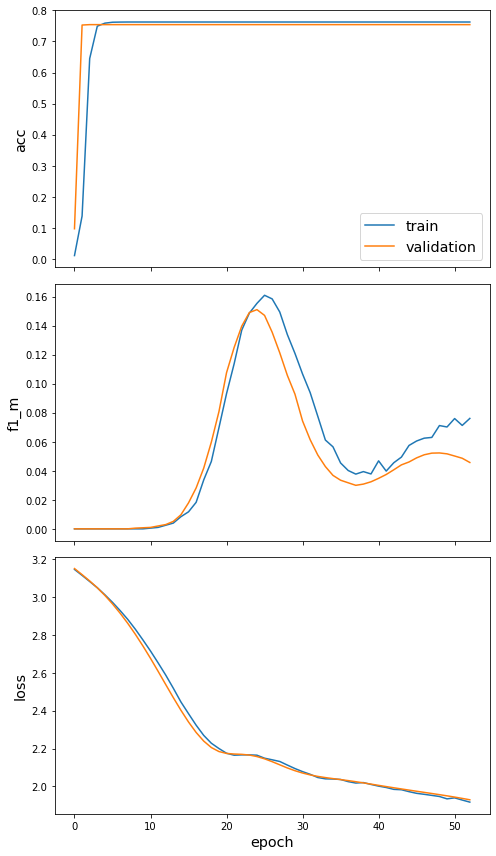

In [12]:
gcn_pipeline(G, node_multi_diseases, layer_sizes=[32, 32])

Array shapes:
 train = (4311, 31)
 val = (8623, 31)
 test = (8623, 31)
Training...
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']


169/173 [============================>.] - ETA: 8s - loss: 1.6254 - acc: 0.7400 - f1_m: 0.1212 - precision_m: 0.1200 - recall_m: 0.122 - ETA: 5s - loss: 1.7619 - acc: 0.7467 - f1_m: 0.0877 - precision_m: 0.0867 - recall_m: 0.088 - ETA: 5s - loss: 1.6370 - acc: 0.7680 - f1_m: 0.0952 - precision_m: 0.0920 - recall_m: 0.098 - ETA: 5s - loss: 1.7001 - acc: 0.7829 - f1_m: 0.0776 - precision_m: 0.0743 - recall_m: 0.081 - ETA: 5s - loss: 1.7413 - acc: 0.7778 - f1_m: 0.0718 - precision_m: 0.0689 - recall_m: 0.075 - ETA: 5s - loss: 1.8139 - acc: 0.7836 - f1_m: 0.0606 - precision_m: 0.0582 - recall_m: 0.063 - ETA: 5s - loss: 1.7342 - acc: 0.7877 - f1_m: 0.0601 - precision_m: 0.0569 - recall_m: 0.064 - ETA: 5s - loss: 1.7264 - acc: 0.7787 - f1_m: 0.0662 - precision_m: 0.0627 - recall_m: 0.070 - ETA: 5s - loss: 1.7617 - acc: 0.7738 - f1_m: 0.0669 - precision_m: 0.0637 - recall_m: 0.070 - ETA: 5s - loss: 1.7347 - acc: 0.7733 - f1_m: 0.0668 - precision_m: 0.0633 - recall_m: 0.071 - ETA: 5s - loss: 1

173/173 [==============================] - ETA: 0s - loss: 1.7841 - acc: 0.7644 - f1_m: 0.0673 - precision_m: 0.0647 - recall_m: 0.071 - 6s 33ms/step - loss: 1.7757 - acc: 0.7641 - f1_m: 0.0676 - precision_m: 0.0649 - recall_m: 0.0715

Test Set Metrics:

loss: 1.7757

acc: 0.7641

f1_m: 0.0676

precision_m: 0.0649

recall_m: 0.0715


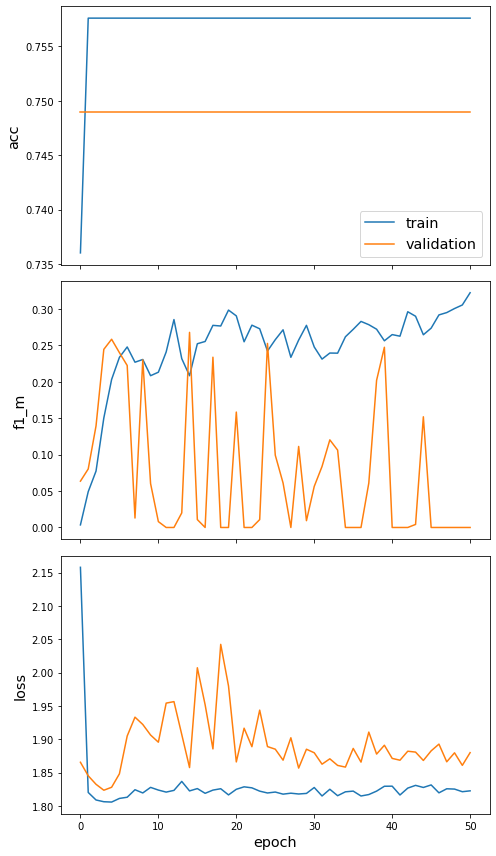

In [13]:
graphsage_pipeline(G, node_multi_diseases)

Diseased Network

In [14]:
dG = sg.StellarGraph(dis_graph, node_features=dis_baseline)

C:\Users\thu71\.conda\envs\Thomas\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Constructing a StellarGraph directly from a NetworkX graph has been replaced by the `StellarGraph.from_networkx` function
  """Entry point for launching an IPython kernel.


Array shapes:
 train = (1005, 30)
 val = (2012, 30)
 test = (2012, 30)
Using GCN (local pooling) filters...
Training...
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
1/1 [==============================] - 0s 34ms/step - loss: 5.8393 - acc: 0.2798 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00

Test Set Metrics:

loss: 5.8393

acc: 0.2798

f1_m: 0.0000

precision_m: 0.0000

recall_m: 0.0000


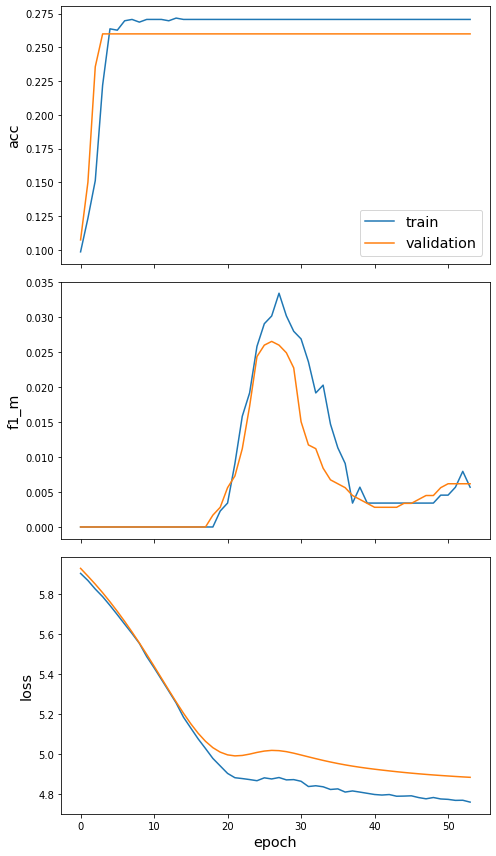

In [15]:
gcn_pipeline(dG, dis_nodes_multi, layer_sizes=[32,32])

Array shapes:
 train = (1005, 30)
 val = (2012, 30)
 test = (2012, 30)
Training...
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
41/41 [==============================] - ETA: 1s - loss: 4.2645 - acc: 0.3200 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+0 - ETA: 1s - loss: 5.1556 - acc: 0.2800 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+0 - ETA: 1s - loss: 5.0306 - acc: 0.3080 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+0 - ETA: 1s - loss: 5.2010 - acc: 0.2686 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+0 - ETA: 1s - loss: 5.2335 - acc: 0.2644 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+0 - ETA: 0s - loss: 5.0555 - acc: 0.2727 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+0 - ETA: 0s - loss: 5.1455 - acc: 0.2671 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+0 - ETA: 0s - loss: 5.1398 - acc: 0.2713 - f1_m: 0.0000e+00 - p

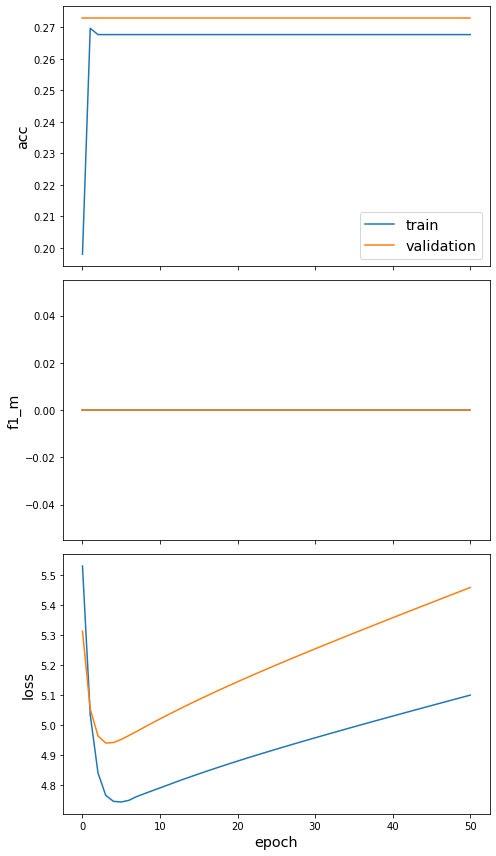

In [16]:
graphsage_pipeline(dG, dis_nodes_multi)

**3-graphlet**

*Exact*

Full Network

In [17]:
# G_motif3_exact = sg.StellarGraph(graph, node_features=motif3_exact_multi_diseases)
# G_motif3_exact.info()
G_motif3_exact = sg.StellarGraph(graph, node_features=three_orbitals_exact)
G_motif3_exact.info()

C:\Users\thu71\.conda\envs\Thomas\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Constructing a StellarGraph directly from a NetworkX graph has been replaced by the `StellarGraph.from_networkx` function
  This is separate from the ipykernel package so we can avoid doing imports until


'StellarGraph: Undirected multigraph\n Nodes: 21557, Edges: 342353\n\n Node types:\n  default: [21557]\n    Features: float32 vector, length 5\n    Edge types: default-default->default\n\n Edge types:\n    default-default->default: [342353]\n        Weights: all 1 (default)\n        Features: none'

Array shapes:
 train = (4311, 31)
 val = (8623, 31)
 test = (8623, 31)
Using GCN (local pooling) filters...
Training...
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
1/1 [==============================] - 0s 210ms/step - loss: 6.8113 - acc: 0.7551 - f1_m: 0.5277 - precision_m: 0.5105 - recall_m: 0.5462

Test Set Metrics:

loss: 6.8113

acc: 0.7551

f1_m: 0.5277

precision_m: 0.5105

recall_m: 0.5462


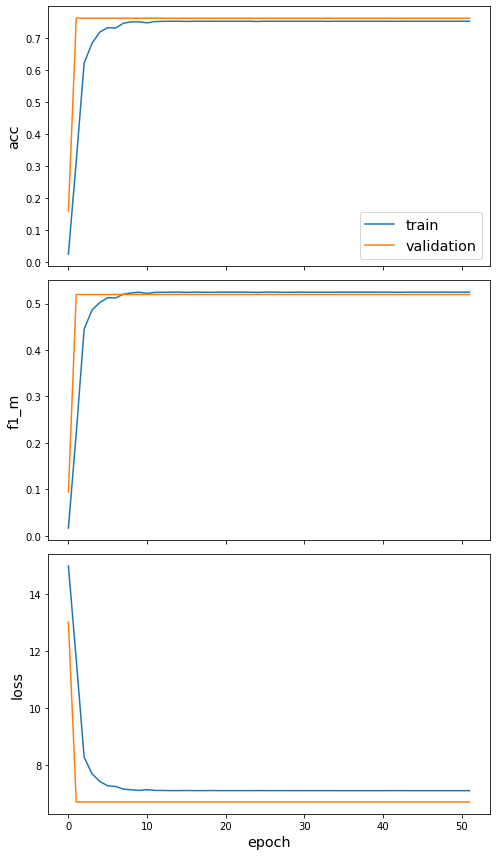

In [18]:
gcn_pipeline(G_motif3_exact, node_multi_diseases, layer_sizes=[32, 32])

Array shapes:
 train = (4311, 31)
 val = (8623, 31)
 test = (8623, 31)
Training...
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']


172/173 [============================>.] - ETA: 5s - loss: 1.4599 - acc: 0.7600 - f1_m: 0.0889 - precision_m: 0.0889 - recall_m: 0.088 - ETA: 5s - loss: 1.8732 - acc: 0.7467 - f1_m: 0.0984 - precision_m: 0.0998 - recall_m: 0.097 - ETA: 4s - loss: 1.9271 - acc: 0.7360 - f1_m: 0.0718 - precision_m: 0.0740 - recall_m: 0.070 - ETA: 4s - loss: 1.7994 - acc: 0.7429 - f1_m: 0.0795 - precision_m: 0.0814 - recall_m: 0.077 - ETA: 4s - loss: 1.8912 - acc: 0.7333 - f1_m: 0.0668 - precision_m: 0.0685 - recall_m: 0.065 - ETA: 4s - loss: 2.0141 - acc: 0.7400 - f1_m: 0.0678 - precision_m: 0.0708 - recall_m: 0.066 - ETA: 4s - loss: 2.0558 - acc: 0.7338 - f1_m: 0.0622 - precision_m: 0.0651 - recall_m: 0.060 - ETA: 4s - loss: 2.0768 - acc: 0.7293 - f1_m: 0.0597 - precision_m: 0.0622 - recall_m: 0.058 - ETA: 4s - loss: 2.1022 - acc: 0.7306 - f1_m: 0.0602 - precision_m: 0.0633 - recall_m: 0.058 - ETA: 4s - loss: 2.0580 - acc: 0.7358 - f1_m: 0.0564 - precision_m: 0.0592 - recall_m: 0.054 - ETA: 4s - loss: 2

173/173 [==============================] - 5s 32ms/step - loss: 1.8421 - acc: 0.7583 - f1_m: 0.0715 - precision_m: 0.0742 - recall_m: 0.0700

Test Set Metrics:

loss: 1.8421

acc: 0.7583

f1_m: 0.0715

precision_m: 0.0742

recall_m: 0.0700


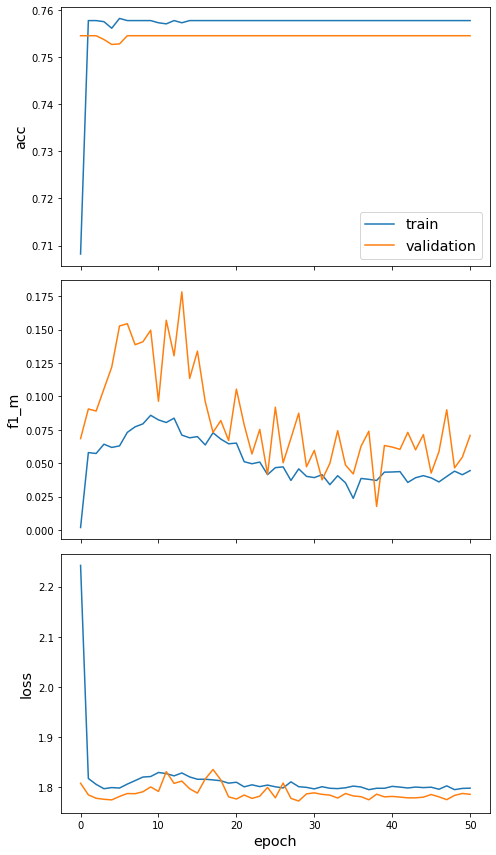

In [19]:
graphsage_pipeline(G_motif3_exact, node_multi_diseases)

Diseased Network

In [20]:
# dG_motif3_exact = sg.StellarGraph(dis_graph, node_features=motif3_exact_multi_only_diseases)
drop_rows = []
for n in three_orbitals_exact.index:
    if n not in nodes:
        drop_rows.append(n)
dis_three_orbitals = three_orbitals_exact.drop(drop_rows)
dG_motif3_exact = sg.StellarGraph(dis_graph, node_features=dis_three_orbitals)
dG_motif3_exact.info()

C:\Users\thu71\.conda\envs\Thomas\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Constructing a StellarGraph directly from a NetworkX graph has been replaced by the `StellarGraph.from_networkx` function
  import sys


'StellarGraph: Undirected multigraph\n Nodes: 5029, Edges: 65674\n\n Node types:\n  default: [5029]\n    Features: float32 vector, length 5\n    Edge types: default-default->default\n\n Edge types:\n    default-default->default: [65674]\n        Weights: all 1 (default)\n        Features: none'

Array shapes:
 train = (1005, 30)
 val = (2012, 30)
 test = (2012, 30)
Using GCN (local pooling) filters...
Training...
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
1/1 [==============================] - 0s 60ms/step - loss: 27.9132 - acc: 0.0179 - f1_m: 0.0322 - precision_m: 0.0448 - recall_m: 0.0252

Test Set Metrics:

loss: 27.9132

acc: 0.0179

f1_m: 0.0322

precision_m: 0.0448

recall_m: 0.0252


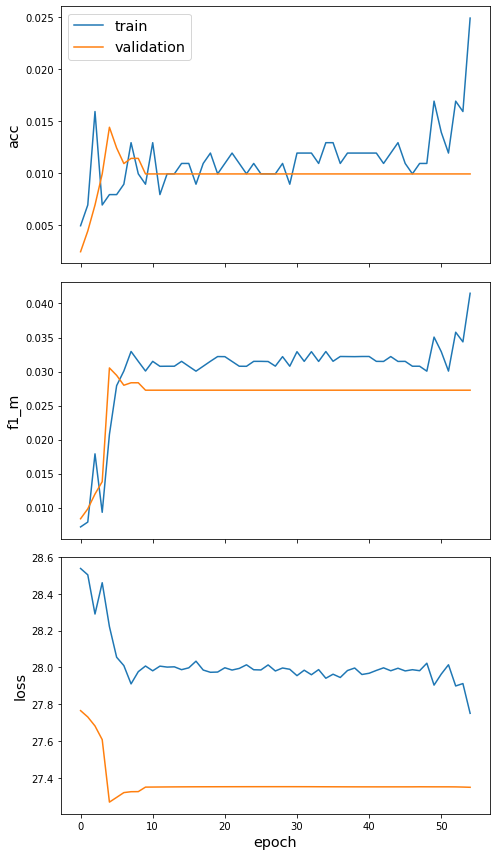

In [21]:
gcn_pipeline(dG_motif3_exact, dis_nodes_multi, layer_sizes=[32, 32])

Array shapes:
 train = (1005, 30)
 val = (2012, 30)
 test = (2012, 30)
Training...
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
41/41 [==============================] - ETA: 1s - loss: 7.0576 - acc: 0.2200 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+0 - ETA: 1s - loss: 5.2691 - acc: 0.2600 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+0 - ETA: 1s - loss: 5.0299 - acc: 0.2680 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+0 - ETA: 1s - loss: 5.0248 - acc: 0.2514 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+0 - ETA: 1s - loss: 4.9978 - acc: 0.2578 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+0 - ETA: 0s - loss: 4.9349 - acc: 0.2764 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+0 - ETA: 0s - loss: 4.9368 - acc: 0.2938 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+0 - ETA: 0s - loss: 4.9290 - acc: 0.2893 - f1_m: 0.0000e+00 - p

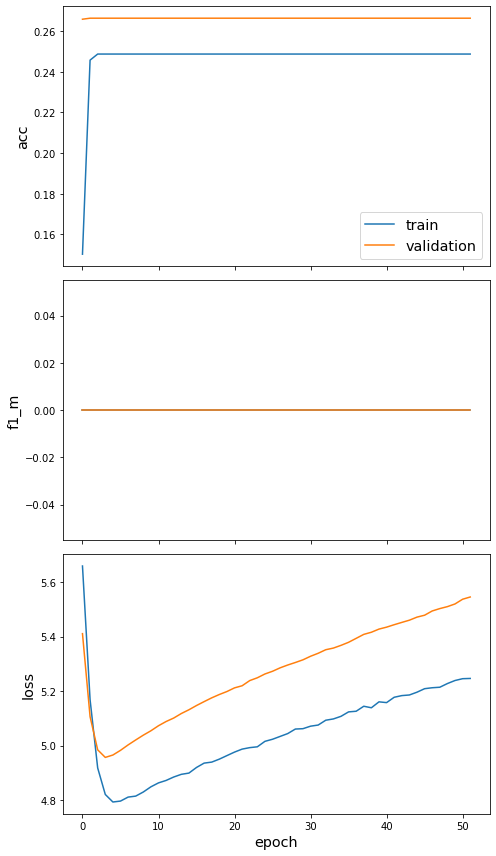

In [22]:
graphsage_pipeline(dG_motif3_exact, dis_nodes_multi)

*Subsampled*

Full Network

In [23]:
# G_motif3_subsampled = sg.StellarGraph(graph, node_features=motif3_multi_diseases)
G_motif3_subsampled = sg.StellarGraph(graph, node_features=three_orbitals)
G_motif3_subsampled.info()

C:\Users\thu71\.conda\envs\Thomas\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Constructing a StellarGraph directly from a NetworkX graph has been replaced by the `StellarGraph.from_networkx` function
  


'StellarGraph: Undirected multigraph\n Nodes: 21557, Edges: 342353\n\n Node types:\n  default: [21557]\n    Features: float32 vector, length 3\n    Edge types: default-default->default\n\n Edge types:\n    default-default->default: [342353]\n        Weights: all 1 (default)\n        Features: none'

Array shapes:
 train = (4311, 31)
 val = (8623, 31)
 test = (8623, 31)
Using GCN (local pooling) filters...
Training...
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
1/1 [==============================] - 0s 183ms/step - loss: 6.8940 - acc: 0.7530 - f1_m: 0.5224 - precision_m: 0.5088 - recall_m: 0.5368

Test Set Metrics:

loss: 6.8940

acc: 0.7530

f1_m: 0.5224

precision_m: 0.5088

recall_m: 0.5368


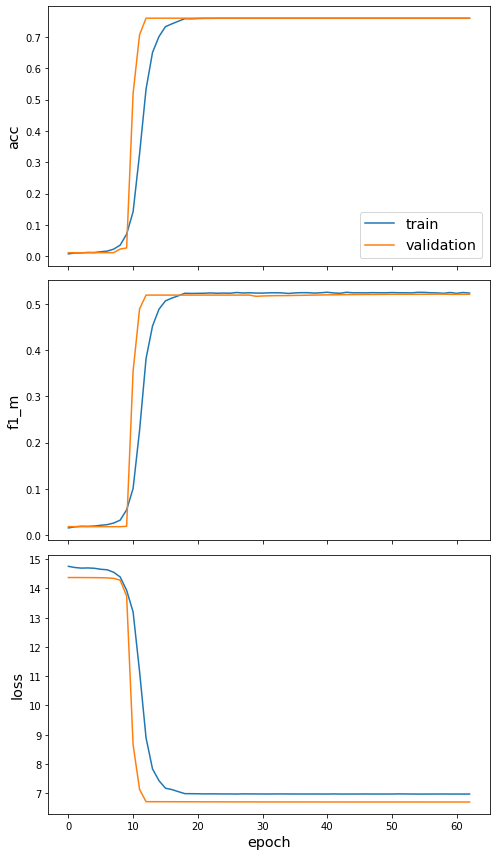

In [24]:
gcn_pipeline(G_motif3_subsampled, node_multi_diseases, layer_sizes=[32, 32])

Array shapes:
 train = (4311, 31)
 val = (8623, 31)
 test = (8623, 31)
Training...
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
173/173 [==============================] - ETA: 9s - loss: 1.6884 - acc: 0.7200 - f1_m: 0.1277 - precision_m: 0.1395 - recall_m: 0.117 - ETA: 6s - loss: 1.8203 - acc: 0.7400 - f1_m: 0.0957 - precision_m: 0.1005 - recall_m: 0.091 - ETA: 5s - loss: 1.7746 - acc: 0.7480 - f1_m: 0.0969 - precision_m: 0.1008 - recall_m: 0.094 - ETA: 5s - loss: 1.7373 - acc: 0.7514 - f1_m: 0.0996 - precision_m: 0.1061 - recall_m: 0.095 - ETA: 5s - loss: 1.6821 - acc: 0.7644 - f1_m: 0.0913 - precision_m: 0.0955 - recall_m: 0.088 - ETA: 5s - loss: 1.7340 - acc: 0.7691 - f1_m: 0.0839 - precision_m: 0.0898 - recall_m: 0.080 - ETA: 5s - loss: 1.7025 - acc: 0.7677 - f1_m: 0.0871 - precision_m: 0.0919 - recall_m: 0.084 - ETA: 5s - loss: 1.7545 - acc: 0.7680 - f1_m: 0.0881 - precision_m: 0.0934 - recall_m: 0.084 - ETA: 5s - loss: 1.7468 - acc: 0.7706 - f1_m: 0.


Test Set Metrics:

loss: 1.8624

acc: 0.7563

f1_m: 0.0799

precision_m: 0.0850

recall_m: 0.0765


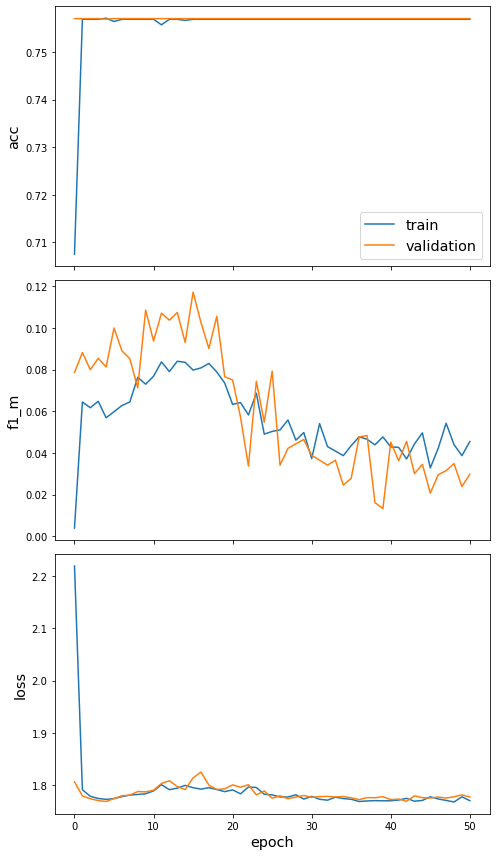

In [25]:
graphsage_pipeline(G_motif3_subsampled, node_multi_diseases)

Diseased Network

In [26]:
# dG_motif3_subsampled = sg.StellarGraph(dis_graph, node_features=motif3_multi_only_diseases)
drop_rows = []
for n in three_orbitals.index:
    if n not in nodes:
        drop_rows.append(n)
dis_three_orbitals = three_orbitals.drop(drop_rows)
dG_motif3_subsampled = sg.StellarGraph(dis_graph, node_features=dis_three_orbitals)
dG_motif3_subsampled.info()

C:\Users\thu71\.conda\envs\Thomas\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Constructing a StellarGraph directly from a NetworkX graph has been replaced by the `StellarGraph.from_networkx` function
  import sys


'StellarGraph: Undirected multigraph\n Nodes: 5029, Edges: 65674\n\n Node types:\n  default: [5029]\n    Features: float32 vector, length 3\n    Edge types: default-default->default\n\n Edge types:\n    default-default->default: [65674]\n        Weights: all 1 (default)\n        Features: none'

Array shapes:
 train = (1005, 30)
 val = (2012, 30)
 test = (2012, 30)
Using GCN (local pooling) filters...
Training...
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
1/1 [==============================] - 0s 37ms/step - loss: 21.4499 - acc: 0.2659 - f1_m: 0.2928 - precision_m: 0.4023 - recall_m: 0.2302

Test Set Metrics:

loss: 21.4499

acc: 0.2659

f1_m: 0.2928

precision_m: 0.4023

recall_m: 0.2302


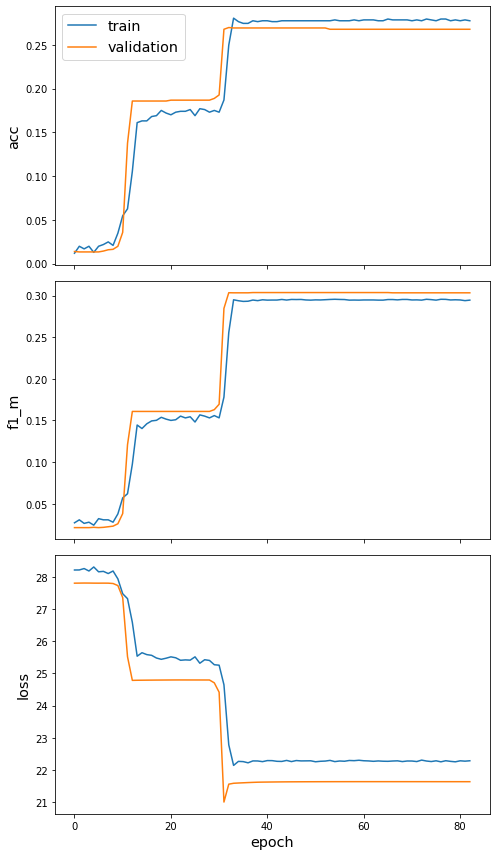

In [27]:
gcn_pipeline(dG_motif3_subsampled, dis_nodes_multi, layer_sizes=[32, 32])

Array shapes:
 train = (1005, 30)
 val = (2012, 30)
 test = (2012, 30)
Training...
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
41/41 [==============================] - ETA: 1s - loss: 3.8072 - acc: 0.2800 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+0 - ETA: 1s - loss: 4.2702 - acc: 0.2667 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+0 - ETA: 1s - loss: 4.4011 - acc: 0.2560 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+0 - ETA: 1s - loss: 4.3948 - acc: 0.2567 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+0 - ETA: 1s - loss: 4.4864 - acc: 0.2578 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+0 - ETA: 0s - loss: 4.5719 - acc: 0.2509 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+0 - ETA: 0s - loss: 4.6830 - acc: 0.2662 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+0 - ETA: 0s - loss: 4.5932 - acc: 0.2653 - f1_m: 0.0000e+00 - p

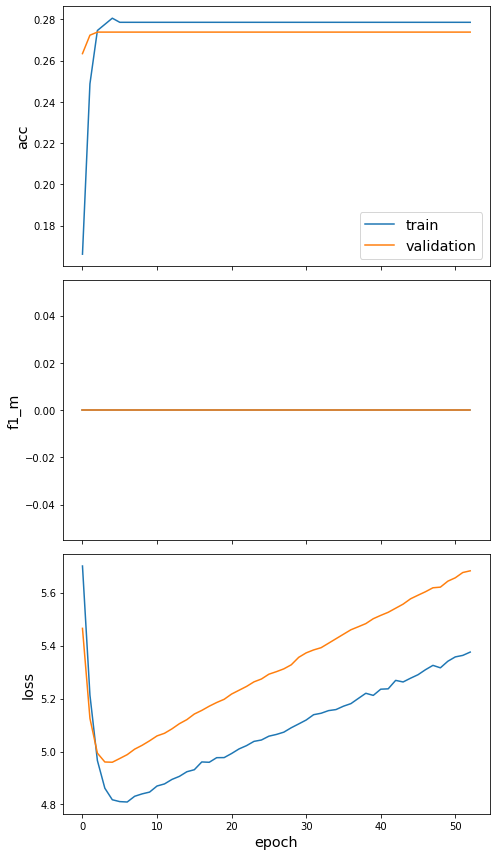

In [28]:
graphsage_pipeline(dG_motif3_subsampled, dis_nodes_multi)

**4-graphlet**

Full Network

In [29]:
# G_motif4 = sg.StellarGraph(graph, node_features=motif4_multi_diseases)
G_motif4 = sg.StellarGraph(graph, node_features=four_orbitals)
G_motif4.info()

C:\Users\thu71\.conda\envs\Thomas\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Constructing a StellarGraph directly from a NetworkX graph has been replaced by the `StellarGraph.from_networkx` function
  


'StellarGraph: Undirected multigraph\n Nodes: 21557, Edges: 342353\n\n Node types:\n  default: [21557]\n    Features: float32 vector, length 11\n    Edge types: default-default->default\n\n Edge types:\n    default-default->default: [342353]\n        Weights: all 1 (default)\n        Features: none'

Array shapes:
 train = (4311, 31)
 val = (8623, 31)
 test = (8623, 31)
Using GCN (local pooling) filters...
Training...
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
1/1 [==============================] - 0s 353ms/step - loss: 6.7409 - acc: 0.7599 - f1_m: 0.5192 - precision_m: 0.4995 - recall_m: 0.5406

Test Set Metrics:

loss: 6.7409

acc: 0.7599

f1_m: 0.5192

precision_m: 0.4995

recall_m: 0.5406


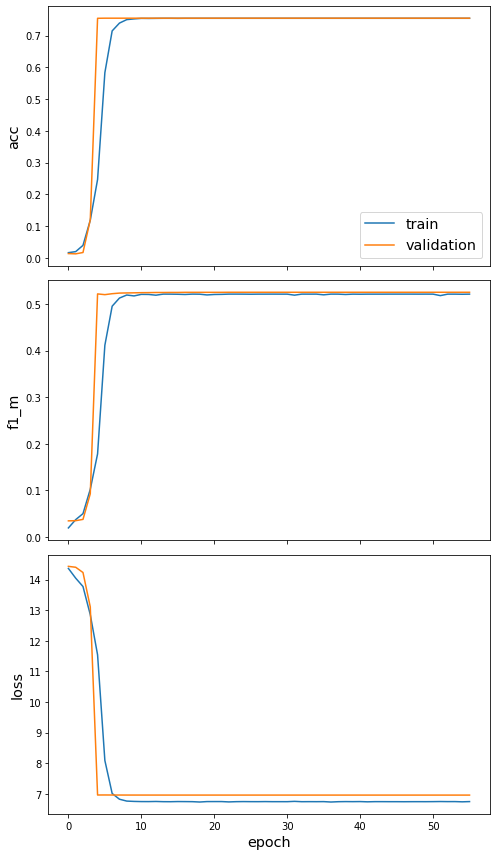

In [30]:
gcn_pipeline(G_motif4, node_multi_diseases, layer_sizes=[32, 32])

Array shapes:
 train = (4311, 31)
 val = (8623, 31)
 test = (8623, 31)
Training...
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
173/173 [==============================] - ETA: 8s - loss: 1.0351 - acc: 0.8800 - f1_m: 0.1013 - precision_m: 0.0909 - recall_m: 0.114 - ETA: 6s - loss: 1.2343 - acc: 0.8267 - f1_m: 0.0429 - precision_m: 0.0382 - recall_m: 0.048 - ETA: 5s - loss: 1.3276 - acc: 0.8040 - f1_m: 0.0591 - precision_m: 0.0572 - recall_m: 0.061 - ETA: 5s - loss: 1.4134 - acc: 0.7971 - f1_m: 0.0521 - precision_m: 0.0508 - recall_m: 0.054 - ETA: 4s - loss: 1.4646 - acc: 0.7933 - f1_m: 0.0510 - precision_m: 0.0501 - recall_m: 0.052 - ETA: 4s - loss: 1.5397 - acc: 0.7836 - f1_m: 0.0501 - precision_m: 0.0504 - recall_m: 0.050 - ETA: 4s - loss: 1.7300 - acc: 0.7769 - f1_m: 0.0502 - precision_m: 0.0522 - recall_m: 0.049 - ETA: 4s - loss: 1.6423 - acc: 0.7893 - f1_m: 0.0502 - precision_m: 0.0512 - recall_m: 0.050 - ETA: 4s - loss: 1.6449 - acc: 0.7824 - f1_m: 0.


Test Set Metrics:

loss: 1.8639

acc: 0.7602

f1_m: 0.0593

precision_m: 0.0626

recall_m: 0.0571


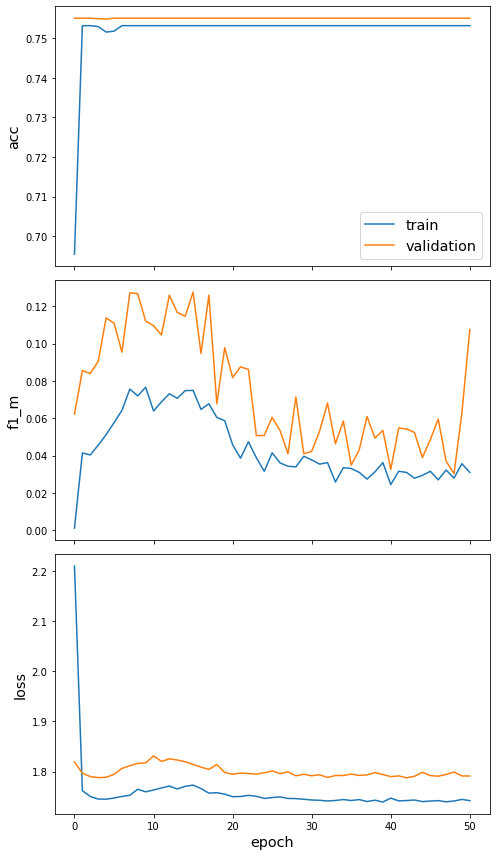

In [31]:
graphsage_pipeline(G_motif4, node_multi_diseases)

Diseased Network

In [32]:
# dG_motif4 = sg.StellarGraph(dis_graph, node_features=motif4_multi_only_diseases)
drop_rows = []
for n in four_orbitals.index:
    if n not in nodes:
        drop_rows.append(n)
dis_three_orbitals = four_orbitals.drop(drop_rows)
dG_motif4 = sg.StellarGraph(dis_graph, node_features=dis_three_orbitals)
dG_motif4.info()

C:\Users\thu71\.conda\envs\Thomas\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Constructing a StellarGraph directly from a NetworkX graph has been replaced by the `StellarGraph.from_networkx` function
  import sys


'StellarGraph: Undirected multigraph\n Nodes: 5029, Edges: 65674\n\n Node types:\n  default: [5029]\n    Features: float32 vector, length 11\n    Edge types: default-default->default\n\n Edge types:\n    default-default->default: [65674]\n        Weights: all 1 (default)\n        Features: none'

Array shapes:
 train = (1005, 30)
 val = (2012, 30)
 test = (2012, 30)
Using GCN (local pooling) filters...
Training...
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
1/1 [==============================] - 0s 69ms/step - loss: 21.7008 - acc: 0.2694 - f1_m: 0.3002 - precision_m: 0.4153 - recall_m: 0.2351

Test Set Metrics:

loss: 21.7008

acc: 0.2694

f1_m: 0.3002

precision_m: 0.4153

recall_m: 0.2351


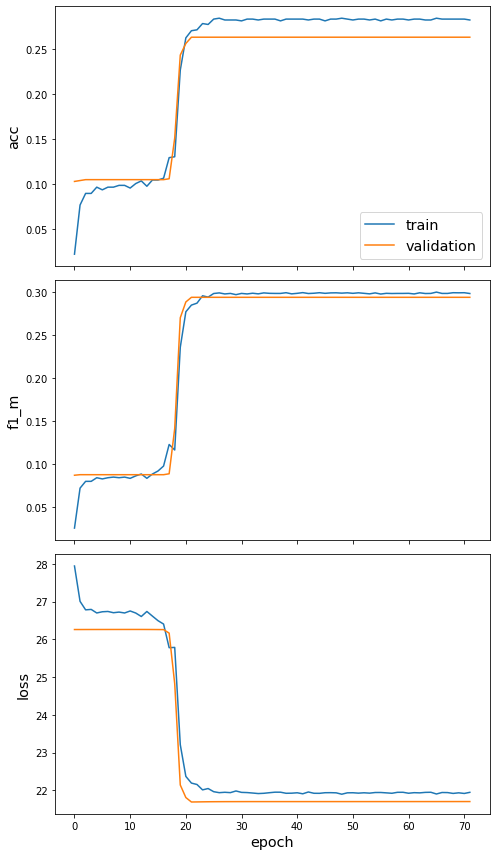

In [33]:
gcn_pipeline(dG_motif4, dis_nodes_multi, layer_sizes=[32, 32])

Array shapes:
 train = (1005, 30)
 val = (2012, 30)
 test = (2012, 30)
Training...
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
41/41 [==============================] - ETA: 1s - loss: 5.8435 - acc: 0.2400 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+0 - ETA: 1s - loss: 6.1256 - acc: 0.2600 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+0 - ETA: 1s - loss: 5.7046 - acc: 0.3040 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+0 - ETA: 1s - loss: 5.7080 - acc: 0.3029 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+0 - ETA: 1s - loss: 5.6023 - acc: 0.3067 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+0 - ETA: 0s - loss: 5.5917 - acc: 0.2900 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+0 - ETA: 0s - loss: 5.5778 - acc: 0.2862 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+0 - ETA: 0s - loss: 5.5475 - acc: 0.2875 - f1_m: 0.0000e+00 - p

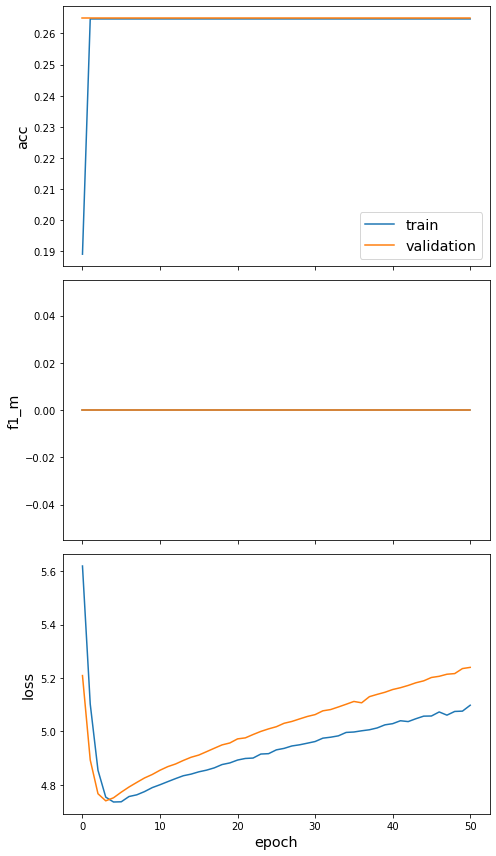

In [34]:
graphsage_pipeline(dG_motif4, dis_nodes_multi)

**Provided Orbitals**

In [35]:
motifs = pd.read_csv('data/bio-pathways-proteinmotifs.csv', index_col=0)

In [36]:
all_motifs_multi_only_diseases = dis_nodes_multi.join(motifs)
all_motifs_multi_diseases = node_multi_diseases.join(motifs)

In [37]:
motif = all_motifs_multi_diseases[motifs.columns]
dis_motif = all_motifs_multi_only_diseases[motifs.columns]

In [38]:
# G_motif_exact = sg.StellarGraph(graph, node_features=all_motifs_multi_diseases)
G_motif_exact = sg.StellarGraph(graph, node_features=motif)
G_motif_exact.info()

C:\Users\thu71\.conda\envs\Thomas\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Constructing a StellarGraph directly from a NetworkX graph has been replaced by the `StellarGraph.from_networkx` function
  


'StellarGraph: Undirected multigraph\n Nodes: 21557, Edges: 342353\n\n Node types:\n  default: [21557]\n    Features: float32 vector, length 73\n    Edge types: default-default->default\n\n Edge types:\n    default-default->default: [342353]\n        Weights: all 1 (default)\n        Features: none'

In [39]:
# dG_motif_exact = sg.StellarGraph(dis_graph, node_features=all_motifs_multi_only_diseases)
dG_motif_exact = sg.StellarGraph(dis_graph, node_features=dis_motif)
dG_motif_exact.info()

C:\Users\thu71\.conda\envs\Thomas\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Constructing a StellarGraph directly from a NetworkX graph has been replaced by the `StellarGraph.from_networkx` function
  


'StellarGraph: Undirected multigraph\n Nodes: 5029, Edges: 65674\n\n Node types:\n  default: [5029]\n    Features: float32 vector, length 73\n    Edge types: default-default->default\n\n Edge types:\n    default-default->default: [65674]\n        Weights: all 1 (default)\n        Features: none'

Full Network

Array shapes:
 train = (4311, 31)
 val = (8623, 31)
 test = (8623, 31)
Using GCN (local pooling) filters...
Training...
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
1/1 [==============================] - 0s 433ms/step - loss: 6.6068 - acc: 0.7605 - f1_m: 0.5348 - precision_m: 0.5152 - recall_m: 0.5560

Test Set Metrics:

loss: 6.6068

acc: 0.7605

f1_m: 0.5348

precision_m: 0.5152

recall_m: 0.5560


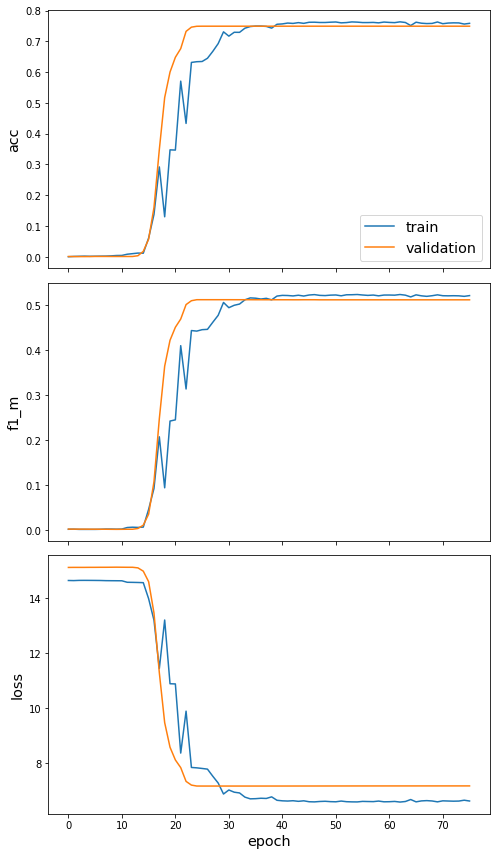

In [40]:
gcn_pipeline(G_motif_exact, node_multi_diseases)

Array shapes:
 train = (4311, 31)
 val = (8623, 31)
 test = (8623, 31)
Training...
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']


172/173 [============================>.] - ETA: 6s - loss: 1.8096 - acc: 0.7400 - f1_m: 0.1087 - precision_m: 0.1087 - recall_m: 0.108 - ETA: 5s - loss: 1.2813 - acc: 0.7867 - f1_m: 0.0945 - precision_m: 0.0861 - recall_m: 0.106 - ETA: 6s - loss: 1.3587 - acc: 0.7800 - f1_m: 0.0877 - precision_m: 0.0812 - recall_m: 0.096 - ETA: 7s - loss: 1.6408 - acc: 0.7800 - f1_m: 0.0889 - precision_m: 0.0863 - recall_m: 0.094 - ETA: 6s - loss: 1.7511 - acc: 0.7629 - f1_m: 0.0861 - precision_m: 0.0859 - recall_m: 0.088 - ETA: 6s - loss: 1.9013 - acc: 0.7556 - f1_m: 0.0907 - precision_m: 0.0939 - recall_m: 0.089 - ETA: 6s - loss: 1.9632 - acc: 0.7509 - f1_m: 0.0910 - precision_m: 0.0952 - recall_m: 0.089 - ETA: 6s - loss: 2.0512 - acc: 0.7369 - f1_m: 0.0896 - precision_m: 0.0943 - recall_m: 0.087 - ETA: 6s - loss: 2.0970 - acc: 0.7300 - f1_m: 0.0860 - precision_m: 0.0909 - recall_m: 0.083 - ETA: 6s - loss: 2.0909 - acc: 0.7262 - f1_m: 0.0805 - precision_m: 0.0849 - recall_m: 0.078 - ETA: 5s - loss: 2

173/173 [==============================] - 5s 31ms/step - loss: 1.8768 - acc: 0.7464 - f1_m: 0.0842 - precision_m: 0.0856 - recall_m: 0.0840

Test Set Metrics:

loss: 1.8768

acc: 0.7464

f1_m: 0.0842

precision_m: 0.0856

recall_m: 0.0840


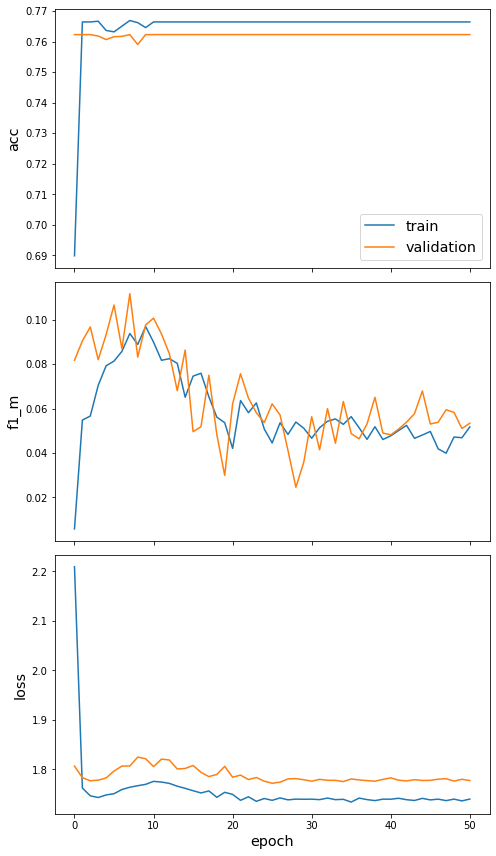

In [41]:
graphsage_pipeline(G_motif_exact, node_multi_diseases)

Diseased Network

Array shapes:
 train = (1005, 30)
 val = (2012, 30)
 test = (2012, 30)
Using GCN (local pooling) filters...
Training...
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
1/1 [==============================] - 0s 95ms/step - loss: 27.9670 - acc: 0.0050 - f1_m: 0.0108 - precision_m: 0.0149 - recall_m: 0.0085

Test Set Metrics:

loss: 27.9670

acc: 0.0050

f1_m: 0.0108

precision_m: 0.0149

recall_m: 0.0085


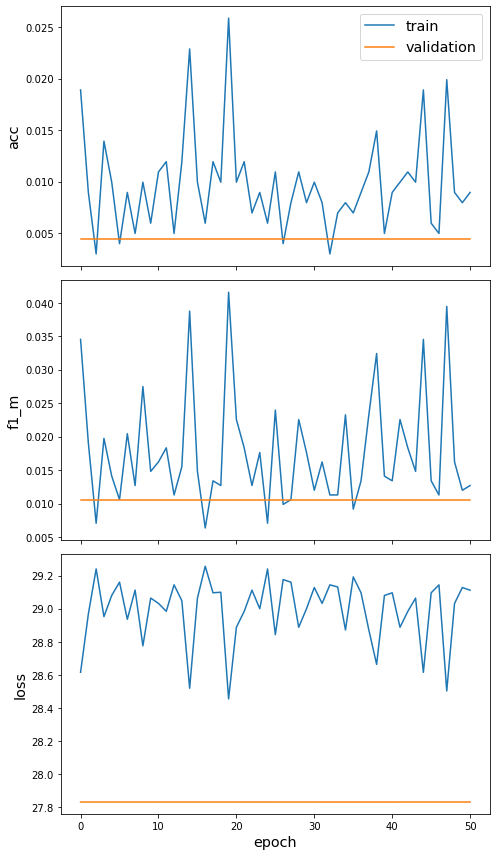

In [42]:
gcn_pipeline(dG_motif_exact, dis_nodes_multi)

Array shapes:
 train = (1005, 30)
 val = (2012, 30)
 test = (2012, 30)
Training...
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
41/41 [==============================] - ETA: 1s - loss: 4.9522 - acc: 0.2400 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+0 - ETA: 1s - loss: 4.2197 - acc: 0.3133 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+0 - ETA: 1s - loss: 4.6588 - acc: 0.3160 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+0 - ETA: 1s - loss: 4.6950 - acc: 0.3100 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+0 - ETA: 1s - loss: 4.6685 - acc: 0.3133 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+0 - ETA: 1s - loss: 4.7398 - acc: 0.3000 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+0 - ETA: 0s - loss: 4.7320 - acc: 0.2908 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+0 - ETA: 0s - loss: 4.7603 - acc: 0.2813 - f1_m: 0.0000e+00 - p

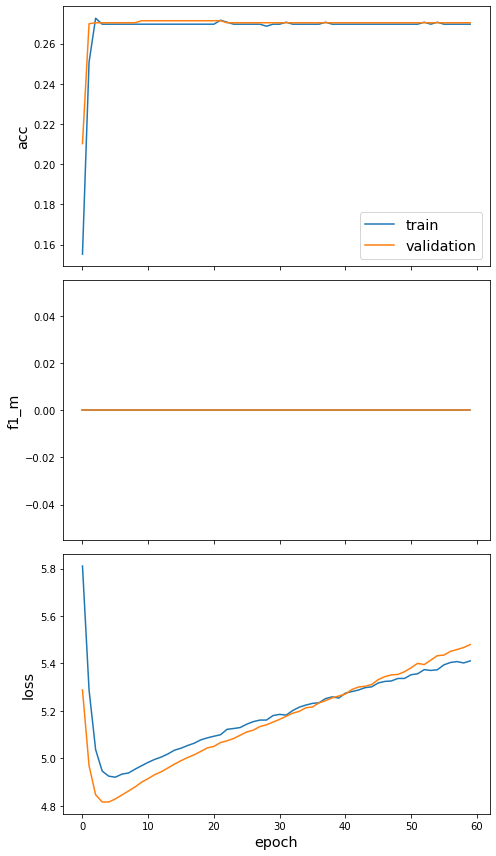

In [43]:
graphsage_pipeline(dG_motif_exact, dis_nodes_multi)